In [3]:
!pwd

/Users/alessandrorinaldi/code/Pr4t3/DriverDrowsinessDetector/notebooks


## Model Testing

In [ ]:
import os
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [139]:
def generator(dir, 
              gen=image.ImageDataGenerator(rescale=1./255), 
              shuffle=True,batch_size=1,
              target_size=(24,24),
              class_mode='categorical' ):

    return gen.flow_from_directory(dir,
                                   batch_size=batch_size,
                                   shuffle=shuffle,
                                   color_mode='grayscale',
                                   class_mode=class_mode,
                                   target_size=target_size)

In [159]:
BS= 32
TS=(24,24)
train_batch= generator('../raw_data/eyes/train_eyes',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('../raw_data/eyes/valid_eyes',shuffle=True, batch_size=BS,target_size=TS)
test_batch = generator('../raw_data/eyes/test_eyes',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
38 6


In [149]:
def model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
        MaxPooling2D(pool_size=(2,2), strides = 2, padding="same"),

        Conv2D(32,(3,3),activation='relu'),
        #MaxPooling2D(pool_size=(2,2), strides = 2, padding="same"),

    #32 convolution filters used each of size 3x3
    #again
        Conv2D(64, (3, 3), activation='relu'),
        #MaxPooling2D(pool_size=(2,2), strides = 2, padding="same"),

    #64 convolution filters used each of size 3x3
    #choose the best features via pooling

    #randomly turn neurons on and off to improve convergence
        #Dropout(0.25),
    #flatten since too many dimensions, we only want a classification output
        Flatten(),
    #fully connected to get all relevant data
        Dense(128, activation='relu'),
    #one more dropout for convergence' sake :) 
        #Dropout(0.5),
    #output a softmax to squash the matrix into output probabilities
        Dense(2, activation='softmax')
    ])
    
    model.compile(loss="categorical_crossentropy", metrics=[recall], optimizer='adam')

    return model

In [144]:
def kaggle_model():

    model = Sequential()

    model.add(Conv2D(256, (3, 3), activation="relu", strides = (1,1), padding="same", input_shape=(24,24,1)))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(128, (3, 3), activation="relu"))
    #model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    #model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(32, (3, 3), activation="relu"))
    #model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))

    model.compile(loss="categorical_crossentropy", metrics=[recall], optimizer='adam')

    #model.summary()
    
    return model

In [145]:
model_k = kaggle_model()

In [146]:
history = model_k.fit(train_batch, 
                      validation_data=valid_batch, shuffle = True,
                      epochs=50,steps_per_epoch=SPE, 
                      validation_steps=VS, 
                      callbacks=[es])

Epoch 1/50
37/37 [==============================] - 5s 101ms/step - loss: 0.4882 - recall_30: 0.7947 - val_loss: 0.2676 - val_recall_30: 0.9167
Epoch 2/50
37/37 [==============================] - 3s 88ms/step - loss: 0.2538 - recall_30: 0.9053 - val_loss: 0.1906 - val_recall_30: 0.9062
Epoch 3/50
37/37 [==============================] - 3s 89ms/step - loss: 0.1739 - recall_30: 0.9346 - val_loss: 0.0958 - val_recall_30: 0.9583
Epoch 4/50
37/37 [==============================] - 3s 92ms/step - loss: 0.1252 - recall_30: 0.9518 - val_loss: 0.0860 - val_recall_30: 0.9635
Epoch 5/50
37/37 [==============================] - 3s 92ms/step - loss: 0.1089 - recall_30: 0.9596 - val_loss: 0.0885 - val_recall_30: 0.9635
Epoch 6/50
37/37 [==============================] - 3s 88ms/step - loss: 0.0869 - recall_30: 0.9690 - val_loss: 0.1451 - val_recall_30: 0.9583
Epoch 7/50
37/37 [==============================] - 3s 87ms/step - loss: 0.1176 - recall_30: 0.9561 - val_loss: 0.0840 - val_recall_30: 0.958

In [160]:
res = model_k.evaluate(test_batch)

4/4 [==============================] - 0s 29ms/step - loss: 0.1958 - recall_30: 0.9800


In [156]:
history.history

{'loss': [0.48822876811027527,
  0.25378838181495667,
  0.17392458021640778,
  0.1252424567937851,
  0.10887192189693451,
  0.08686547726392746,
  0.11761474609375,
  0.07762522995471954,
  0.07711289077997208,
  0.07596513628959656,
  0.059144701808691025,
  0.04325881972908974,
  0.0493469201028347,
  0.04828086867928505,
  0.043381571769714355,
  0.03959457203745842,
  0.03482569381594658,
  0.025425493717193604,
  0.02314070798456669,
  0.007440888788551092,
  0.01920987479388714,
  0.014886987395584583,
  0.0313902348279953,
  0.010608507320284843,
  0.024728797376155853,
  0.008241898380219936,
  0.0166435856372118,
  0.013558220118284225,
  0.010399005375802517,
  0.01597052998840809,
  0.008664808236062527,
  0.017008569091558456,
  0.013368685729801655,
  0.013453356921672821,
  0.010658728890120983,
  0.010114604607224464,
  0.0065320986323058605,
  0.009138289839029312,
  0.017134957015514374,
  0.004229420330375433,
  0.006821453105658293,
  0.0021652502473443747,
  0.00282

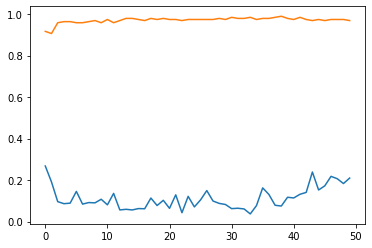

In [157]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_recall_30'])

In [150]:
model = model()

In [151]:
history_2 = model.fit(train_batch, 
                      validation_data=valid_batch, shuffle = True,
                      epochs=50,steps_per_epoch=SPE, 
                      validation_steps=VS, 
                      callbacks=[es])

Epoch 1/50
37/37 [==============================] - 5s 126ms/step - loss: 0.4087 - recall_30: 0.8228 - val_loss: 0.3931 - val_recall_30: 0.8229
Epoch 2/50
37/37 [==============================] - 3s 68ms/step - loss: 0.2112 - recall_30: 0.9217 - val_loss: 0.1686 - val_recall_30: 0.9427
Epoch 3/50
37/37 [==============================] - 2s 61ms/step - loss: 0.1664 - recall_30: 0.9406 - val_loss: 0.1837 - val_recall_30: 0.9271
Epoch 4/50
37/37 [==============================] - 2s 60ms/step - loss: 0.1196 - recall_30: 0.9544 - val_loss: 0.1376 - val_recall_30: 0.9531
Epoch 5/50
37/37 [==============================] - 2s 60ms/step - loss: 0.0840 - recall_30: 0.9656 - val_loss: 0.1279 - val_recall_30: 0.9375
Epoch 6/50
37/37 [==============================] - 2s 62ms/step - loss: 0.0673 - recall_30: 0.9733 - val_loss: 0.1293 - val_recall_30: 0.9479
Epoch 7/50
37/37 [==============================] - 2s 60ms/step - loss: 0.0705 - recall_30: 0.9733 - val_loss: 0.1127 - val_recall_30: 0.947

In [161]:
res = model.evaluate(test_batch)

4/4 [==============================] - 0s 7ms/step - loss: 0.2104 - recall_30: 0.9800


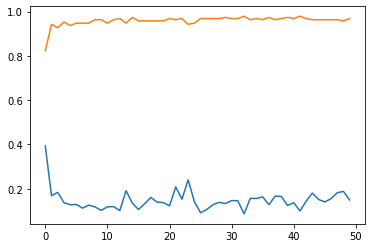

In [158]:
plt.plot(history_2.history['val_loss'])
plt.plot(history_2.history['val_recall_30'])

In [162]:
model.save('../models/model_eyes.h5', overwrite=True)

In [96]:
adam_opt = optimizers.Adam(learning_rate=0.10, beta_1=0.9, beta_2=0.999)

In [60]:
recall = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
es = callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=[recall])

history = model.fit(train_batch, validation_data=valid_batch,epochs=50,steps_per_epoch=SPE, validation_steps=VS, callbacks=[es])

Epoch 1/50
38/38 [==============================] - 4s 96ms/step - loss: 7.6115 - recall_29: 0.4842 - val_loss: 0.6932 - val_recall_29: 0.4844
Epoch 2/50
38/38 [==============================] - 3s 68ms/step - loss: 0.6941 - recall_29: 0.4884 - val_loss: 0.6930 - val_recall_29: 0.5104
Epoch 3/50
38/38 [==============================] - 3s 67ms/step - loss: 0.6940 - recall_29: 0.4950 - val_loss: 0.6927 - val_recall_29: 0.5156
Epoch 4/50
38/38 [==============================] - 2s 66ms/step - loss: 0.6944 - recall_29: 0.4842 - val_loss: 0.6931 - val_recall_29: 0.5052
Epoch 5/50
38/38 [==============================] - 3s 66ms/step - loss: 0.6937 - recall_29: 0.4942 - val_loss: 0.6929 - val_recall_29: 0.5104
Epoch 6/50
38/38 [==============================] - 3s 73ms/step - loss: 0.6937 - recall_29: 0.4884 - val_loss: 0.6937 - val_recall_29: 0.5000
Epoch 7/50
38/38 [==============================] - 3s 68ms/step - loss: 0.6938 - recall_29: 0.5025 - val_loss: 0.6939 - val_recall_29: 0.4844

In [62]:
# To test: 
# 3 values learning rate 
# beta_1, beta_2
# stride - keep it at 1

# Implement: 
# Validation split

adam_opt = optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999)
recall = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
es = callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_2.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=[recall])

history_2 = model_2.fit(train_batch, validation_data=valid_batch,epochs=50,steps_per_epoch=SPE, validation_steps=VS, callbacks=[es])

Epoch 1/50
38/38 [==============================] - 3s 76ms/step - loss: 1.1126 - recall_30: 0.4967 - val_loss: 0.6943 - val_recall_30: 0.5000
Epoch 2/50
38/38 [==============================] - 2s 63ms/step - loss: 0.6943 - recall_30: 0.5058 - val_loss: 0.6943 - val_recall_30: 0.5052
Epoch 3/50
38/38 [==============================] - 2s 59ms/step - loss: 0.6944 - recall_30: 0.4917 - val_loss: 0.6932 - val_recall_30: 0.4948
Epoch 4/50
38/38 [==============================] - 2s 61ms/step - loss: 0.6936 - recall_30: 0.5033 - val_loss: 0.6936 - val_recall_30: 0.4948
Epoch 5/50
38/38 [==============================] - 2s 63ms/step - loss: 0.6942 - recall_30: 0.4634 - val_loss: 0.6936 - val_recall_30: 0.4844
Epoch 6/50
38/38 [==============================] - 2s 58ms/step - loss: 0.6935 - recall_30: 0.4792 - val_loss: 0.6936 - val_recall_30: 0.4844
Epoch 7/50
38/38 [==============================] - 2s 59ms/step - loss: 0.6944 - recall_30: 0.4825 - val_loss: 0.6932 - val_recall_30: 0.4948

In [29]:
history.history

{'loss': [0.6932916641235352,
  0.6934102177619934,
  0.6933446526527405,
  0.6943046450614929,
  0.6933184266090393,
  0.6936953663825989,
  0.6933460235595703,
  0.6935112476348877,
  0.6931918263435364,
  0.6932404637336731,
  0.6936151385307312,
  0.6935116648674011,
  0.693412721157074,
  0.6933141946792603,
  0.6934435367584229,
  0.693547785282135,
  0.6932939291000366,
  0.6933596134185791,
  0.6935021877288818,
  0.6936171054840088,
  0.6938539743423462],
 'recall_13': [0.49417635798454285,
  0.5049917101860046,
  0.5,
  0.4775374233722687,
  0.48585689067840576,
  0.5008319616317749,
  0.4991680383682251,
  0.4875207841396332,
  0.4900166392326355,
  0.5008319616317749,
  0.5008319616317749,
  0.49251246452331543,
  0.4991680383682251,
  0.5008319616317749,
  0.480033278465271,
  0.4775374233722687,
  0.4825291037559509,
  0.5008319616317749,
  0.49667221307754517,
  0.4900166392326355,
  0.49251246452331543],
 'val_loss': [0.6928815841674805,
  0.6930947303771973,
  0.693183

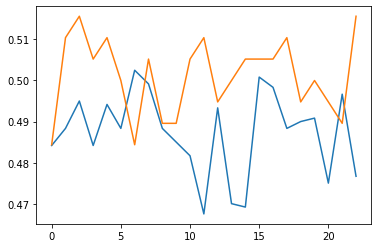

In [63]:
plt.plot(history.history['recall_29'])
plt.plot(history.history['val_recall_29'])

In [64]:
history_2.history

{'loss': [1.1126487255096436,
  0.6943451166152954,
  0.6943642497062683,
  0.6936406493186951,
  0.6942204236984253,
  0.693496823310852,
  0.6944127082824707,
  0.6961260437965393,
  0.6973211765289307,
  0.693647027015686,
  0.694367527961731,
  0.6953568458557129,
  0.6952702403068542,
  0.6940326690673828,
  0.6943004727363586,
  0.6962108612060547,
  0.6950347423553467,
  0.6934135556221008,
  0.6943610310554504,
  0.6940463781356812,
  0.6936529278755188,
  0.6937520503997803,
  0.6951199769973755,
  0.6946102976799011,
  0.693742036819458,
  0.69370436668396,
  0.6940069198608398,
  0.6944172978401184,
  0.6938085556030273,
  0.6938866376876831,
  0.6940563917160034,
  0.6957077383995056,
  0.6943164467811584,
  0.6939433217048645,
  0.69595867395401],
 'recall_30': [0.49667221307754517,
  0.5058236122131348,
  0.4916805326938629,
  0.5033277869224548,
  0.4633943438529968,
  0.4792013168334961,
  0.4825291037559509,
  0.5141431093215942,
  0.48502495884895325,
  0.485856890678

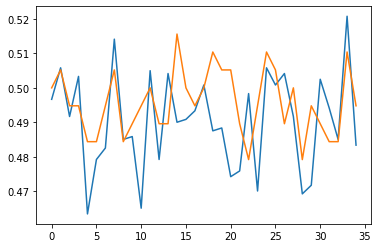

In [65]:
plt.plot(history_2.history['recall_30'])
plt.plot(history_2.history['val_recall_30'])

## Notes 

In [ ]:
y_pred = model.predict_classes(valid_batch[0][0])
y_pred


y_pred = np.argmax(model.predict(valid_batch[0][0]), axis=-1)
y_pred

In [ ]:

# Computing the probabilities of belonging to one of the 4 classes for the 10 000 images
predicted_probabilities = model.predict(X_test) # shape = 10_000 X 4

# Computing the predicted classes for all the images
predicted_classes = np.argmax(predicted_probabilities, axis = 1) # shape = 10_000 , 

# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = np.arange(0,4+1));

fig, ax = plt.subplots(figsize=(10,10));
disp.plot(cmap = "PuRd", ax = ax);